# Importing the Libraries

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.utils import shuffle
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
import os
import pandas as pd
import librosa
import glob 
from sklearn.metrics import accuracy_score

# Loading the dataset

In [2]:
rav_sav= os.listdir('Dataset1/')
tess= os.listdir('Dataset2/')

# Printing size of dataset

In [3]:
print(len(rav_sav))
print(len(tess))

1920
2800


# Mapping the data of RAVDESS and SAVEE

In [4]:
emotions=[]
for file in rav_sav:
    if file[6:-16]=='01':
        emotions.append('neutral')
    elif file[6:-16]=='03' and int(file[18:-4])%2==0:
        emotions.append('happy')
    elif file[6:-16]=='03' and int(file[18:-4])%2==1:
        emotions.append('happy')
    elif file[6:-16]=='04' and int(file[18:-4])%2==0:
        emotions.append('sad')
    elif file[6:-16]=='04' and int(file[18:-4])%2==1:
        emotions.append('sad')
    elif file[6:-16]=='05' and int(file[18:-4])%2==0:
        emotions.append('angry')
    elif file[6:-16]=='05' and int(file[18:-4])%2==1:
        emotions.append('angry')
    elif file[6:-16]=='06' and int(file[18:-4])%2==0:
        emotions.append('fearful')
    elif file[6:-16]=='06' and int(file[18:-4])%2==1:
        emotions.append('fearful')
    elif file[6:-16]=='07':
        emotions.append('disgust')
    elif file[:1]=='a':
        emotions.append('angry')
    elif file[:1]=='f':
        emotions.append('fearful')
    elif file[:1]=='h':
        emotions.append('happy')
    elif file[:2]=='sa':
        emotions.append('sad')

# Mapping the data of TESS

In [5]:
for file in tess:
    if file[-11:-4]=='neutral':
        emotions.append('neutral')
    elif file[-9:-4]=='angry':
        emotions.append('angry')
    elif file[-11:-4]=='disgust':
        emotions.append('disgust')
    elif file[-9:-4]=='happy':
        emotions.append('happy')
    elif file[-7:-4]=='sad':
        emotions.append('sad')
    elif file[-8:-4]=='fear':
        emotions.append('fearful')

# Labelling the data

In [6]:
labels = pd.DataFrame(emotions)

# Feature Extraction of RAVDESS and SAVEE dataset using mfcc

In [7]:
df = pd.DataFrame(columns=['feature'])
count=0
for i,y in enumerate(rav_sav):
    if rav_sav[i][6:-16]!='02' and rav_sav[i][6:-16]!='08' and rav_sav[i][:2]!='su' and rav_sav[i][:1]!='n' and rav_sav[i][:1]!='d':
        X, sample_rate = librosa.load('Dataset1/'+y, res_type='kaiser_fast',duration=2.5,sr=22050,offset=0)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
        feature = mfccs
        df.loc[count] = [feature]
        count=count+1  

# Feature extraction of TESS dataset using mfcc

In [8]:
for i,y in enumerate(tess):
     if tess[i][-6:-4]!='ps':
        X, sample_rate = librosa.load('Dataset2/'+y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X,  sr=sample_rate,  n_mfcc=13), axis=0)
        feature = mfccs
        df.loc[count] = [feature]
        count=count+1 

In [9]:
print(df)

                                                feature
0     [-65.946724, -65.946724, -65.946724, -65.94672...
1     [-63.72445, -63.72445, -63.72445, -63.72445, -...
2     [-59.59301, -59.59301, -59.59301, -59.59301, -...
3     [-66.73365, -66.73365, -66.73365, -66.73365, -...
4     [-61.566444, -57.94428, -56.239346, -58.175125...
...                                                 ...
3691  [-43.600605, -43.108433, -42.603493, -43.46729...
3692  [-31.2706, -23.65622, -21.566856, -22.070164, ...
3693  [-32.686943, -30.507328, -27.698042, -31.79878...
3694  [-41.914738, -40.3994, -39.37127, -39.626366, ...
3695  [-33.994755, -35.7186, -36.789467, -34.117706,...

[3696 rows x 1 columns]


# Splitting into train and test data

In [10]:
tempdf = pd.DataFrame(df['feature'].values.tolist())
df_new = pd.concat([tempdf,labels], axis=1)

In [11]:
ren_df = df_new.rename(index=str, columns={"0": "label"})
ren_df = shuffle(df_new)
ren_df = ren_df.fillna(0)
final_df = np.random.rand(len(ren_df)) < 0.8

In [12]:
train = ren_df[final_df]
test = ren_df[~final_df]
print(len(train))
print(len(test))

2953
743


In [13]:
print(tempdf)

            0          1          2          3          4          5    \
0    -65.946724 -65.946724 -65.946724 -65.946724 -65.946724 -65.946724   
1    -63.724449 -63.724449 -63.724449 -63.724449 -63.724449 -63.724449   
2    -59.593010 -59.593010 -59.593010 -59.593010 -59.593010 -59.593010   
3    -66.733650 -66.733650 -66.733650 -66.733650 -66.733650 -66.733650   
4    -61.566444 -57.944279 -56.239346 -58.175125 -58.332890 -60.323990   
...         ...        ...        ...        ...        ...        ...   
3691 -43.600605 -43.108433 -42.603493 -43.467293 -41.499535 -41.084091   
3692 -31.270599 -23.656219 -21.566856 -22.070164 -24.841099 -28.609322   
3693 -32.686943 -30.507328 -27.698042 -31.798786 -33.790195 -32.447849   
3694 -41.914738 -40.399399 -39.371269 -39.626366 -35.696751 -28.868685   
3695 -33.994755 -35.718601 -36.789467 -34.117706 -30.381868 -28.359896   

            6          7          8          9    ...        206        207  \
0    -65.946724 -65.752853 -65.9

In [14]:
train_set = train.iloc[:, :-1]
train_label = train.iloc[:, -1:]
test_set = test.iloc[:, :-1]
test_label = test.iloc[:, -1:]

# Getting train and test data

In [15]:
X_train = np.array(train_set)
y_train = np.array(train_label)
X_test = np.array(test_set)
y_test = np.array(test_label)

lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2953, 216)
(2953, 6)
(743, 216)
(743, 6)


In [17]:
print(y_test)

[[0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 ...
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]


# Changing the dimensions for RNN model

In [18]:
x_trainrnn =np.expand_dims(X_train, axis=2)
x_testrnn= np.expand_dims(X_test, axis=2)
print(x_trainrnn.shape)
print(x_testrnn.shape)
print(y_train.shape)
print(y_test.shape)

(2953, 216, 1)
(743, 216, 1)
(2953, 6)
(743, 6)


# Training the model using Recurrent neural network

In [21]:
import tensorflow as tf
import keras
from keras.layers.recurrent import LSTM, SimpleRNN
from keras.layers import Input, Flatten, Dropout, Activation, Dense
from keras.models import Sequential


In [22]:
input_shape=(216,1)
model = keras.Sequential()
model.add(SimpleRNN(24,input_shape=input_shape,return_sequences = True))
model.add(Dropout(0.2))
model.add(Dense(24, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 216, 24)           624       
_________________________________________________________________
dropout (Dropout)            (None, 216, 24)           0         
_________________________________________________________________
dense (Dense)                (None, 216, 24)           600       
_________________________________________________________________
dense_1 (Dense)              (None, 216, 64)           1600      
_________________________________________________________________
dropout_1 (Dropout)          (None, 216, 64)           0         
_________________________________________________________________
dense_2 (Dense)              (None, 216, 12)           780       
_________________________________________________________________
dropout_2 (Dropout)          (None, 216, 12)          

In [23]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

In [24]:
rnnhistory = model.fit(x_trainrnn, y_train, epochs=50, batch_size=16, validation_data=(x_testrnn, y_test), shuffle=False)

Epoch 1/50
185/185 [==============================] - 35s 151ms/step - loss: 1.5717 - acc: 0.3082 - val_loss: 1.4258 - val_acc: 0.3513
Epoch 2/50
185/185 [==============================] - 26s 139ms/step - loss: 1.3995 - acc: 0.3444 - val_loss: 1.3882 - val_acc: 0.3742
Epoch 3/50
185/185 [==============================] - 27s 143ms/step - loss: 1.3322 - acc: 0.3776 - val_loss: 1.3464 - val_acc: 0.3943
Epoch 4/50
185/185 [==============================] - 28s 154ms/step - loss: 1.2734 - acc: 0.4331 - val_loss: 1.2350 - val_acc: 0.5262
Epoch 5/50
185/185 [==============================] - 27s 146ms/step - loss: 1.1493 - acc: 0.5313 - val_loss: 1.0430 - val_acc: 0.5962
Epoch 6/50
185/185 [==============================] - 24s 127ms/step - loss: 1.0567 - acc: 0.5720 - val_loss: 0.9686 - val_acc: 0.6299
Epoch 7/50
185/185 [==============================] - 25s 137ms/step - loss: 0.9735 - acc: 0.6173 - val_loss: 0.9145 - val_acc: 0.6406
Epoch 8/50
185/185 [==============================] - 2

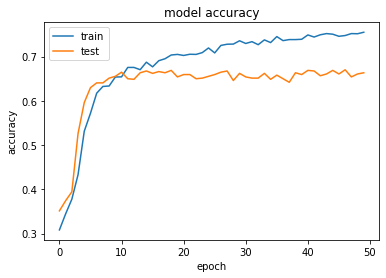

In [25]:
plt.plot(rnnhistory.history['acc'])
plt.plot(rnnhistory.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()